# Stock Price Predictions

In [ ]:
# Import Packages
import requests
import pandas as pd
import time
import numpy as np

# Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# Import data from Alpha Advantage for selected stock
# Add 30 second delay to prevent reaching API limit of 5 calls per minute

# Create list of stock tickers to loop over
tickers = ['DFS','JPM','AXP','C','BAC','USB','WFC']

# Create URL for AlphaVantage API call
apiKey = 'MH7YI4PH913XPSUP'
func = 'TIME_SERIES_DAILY'

#Create empty dataframe to store results of all tickers
df = pd.DataFrame()

# Loop over tickers and concatenate results to dataframe
for i in tickers:
  # Create empty dataframe to store results of loop
  df_tmp = pd.DataFrame()
  df_temp = pd.read_csv('https://www.alphavantage.co/query?function='+func+'&symbol='+i+'&apikey='+apiKey+'&datatype=csv&outputsize=full'
) 
  df_temp['ticker'] = i
  df = pd.concat([df, df_temp], axis=0)

  # Wait 30 seconds before next running loop
  time.sleep(30)

In [ ]:
# Write data to CSV in case dataframe needs re-loaded
df.to_csv('stock_data.csv')
# df = pd.read_csv('stock_data.csv')

In [ ]:
# View data sample
df.head()

,timestamp,open,high,low,close,volume,ticker
0,2022-08-05,101.31000,102.88500,101.05000,102.35000,1313984,DFS
1,2022-08-04,102.75000,102.88000,101.47000,102.36000,1719679,DFS
2,2022-08-03,102.02000,103.07000,101.11960,102.76000,1227094,DFS
3,2022-08-02,101.54000,101.58000,99.70250,100.16000,862239,DFS
4,2022-08-01,100.30000,102.44000,99.34000,102.22000,1890022,DFS


In [ ]:
# View data shape
df.shape

(38182, 7)

In [ ]:
# Verify all data has been selected
df['ticker'].value_counts()

JPM    5728
AXP    5728
C      5728
BAC    5728
USB    5728
WFC    5728
DFS    3814
Name: ticker, dtype: int64

In [ ]:
# Check date ranges of selected tickers
for i in tickers:
  print(i)
  tmp = df[df.ticker==i]
  print('Minimum Date in Data '+str(min(tmp['timestamp'])))
  print('Maximum Date in Data '+str(max(tmp['timestamp'])))

DFS
Minimum Date in Data 2007-06-14
Maximum Date in Data 2022-08-05
JPM
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-08-05
AXP
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-08-05
C
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-08-05
BAC
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-08-05
USB
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-08-05
WFC
Minimum Date in Data 1999-11-01
Maximum Date in Data 2022-08-05


In [ ]:
# Check Format of date field
df['timestamp'].dtype

dtype('O')

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


In [ ]:
df['timestamp'] = df['timestamp'].apply(str_to_datetime)
df['timestamp']

0      2022-08-05
1      2022-08-04
2      2022-08-03
3      2022-08-02
4      2022-08-01
          ...    
5723   1999-11-05
5724   1999-11-04
5725   1999-11-03
5726   1999-11-02
5727   1999-11-01
Name: timestamp, Length: 38182, dtype: datetime64[ns]

In [ ]:
# Check Format of date field after change
df['timestamp'].dtype


dtype('<M8[ns]')

In [ ]:
# Create dataframe to analyze close value
df = df[['ticker','close','timestamp']]

# View Stats of Data 

In [ ]:
# View statistical details of all tickers

# Initialize DataFrame with statistics on closing column for all stock
df_desc = df.describe()
df_desc.rename(columns={'close':'all'},inplace = True)

# Add columns to DataFrame with statistics on closing column for each stock
for i in tickers:
  df_n = df[(df.ticker==i)]
  df_n_desc = df_n.describe()
  df_n_desc.rename(columns={'close':i},inplace = True)
  df_desc = pd.concat([df_desc, df_n_desc], axis=1)

print("Closing Stock Price Summary Statistics")  
df_desc

Closing Stock Price Summary Statistics


,all,DFS,JPM,AXP,C,BAC,USB,WFC
count,38182.00000,3814.00000,5728.00000,5728.00000,5728.00000,5728.00000,5728.00000,5728.00000
mean,49.18537,51.91849,63.03598,71.54406,45.10107,34.45269,35.18607,43.97251
std,28.59390,30.41691,35.04254,37.10509,18.96044,20.85029,11.86651,11.88572
min,1.02000,4.89000,15.45000,10.26000,1.02000,3.14000,8.82000,8.12000
25%,31.00000,23.41500,38.49000,45.81000,38.01750,15.76000,25.05000,33.77000
50%,45.83000,54.35500,47.40000,57.73500,48.29000,29.94000,32.47000,46.24500
75%,57.75750,70.66500,84.15750,90.00000,54.88000,48.25250,43.72250,53.16000
max,198.38000,135.38000,171.78000,198.38000,81.91000,89.01000,63.25000,73.00000


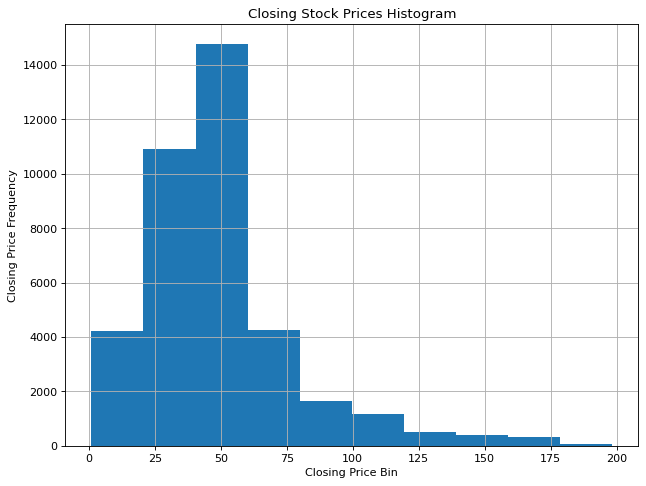

In [ ]:
# View Histogram of Data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df['close'].hist()
plt.title('Closing Stock Prices Histogram')
plt.tight_layout()
plt.xlabel('Closing Price Bin')
plt.ylabel('Closing Price Frequency')
plt.show()

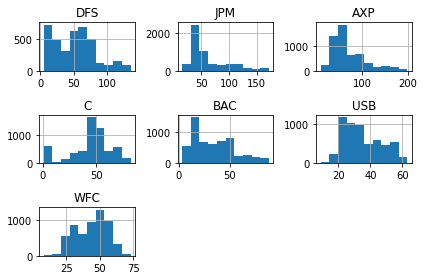

In [ ]:
# View histogram for each stock
n=1
for i in tickers:
  df_n = df[(df.ticker==i)]
  plt.subplot(3,3,n)
  df_n['close'].hist()
  plt.title(i)
  plt.tight_layout()
  n=n+1

plt.show()

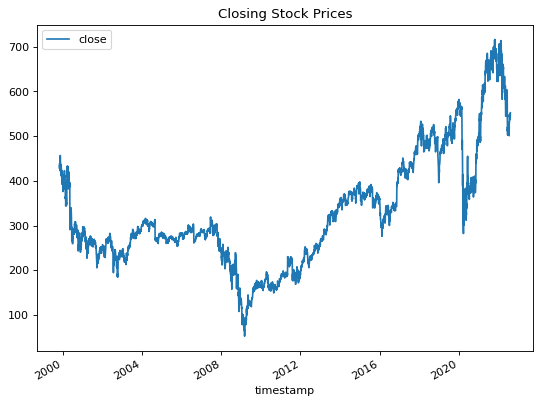

In [ ]:
# Plot closing prices for all stocks over time
figure(figsize=(8, 6), dpi=80)

ax = plt.gca()
df_sum = df.groupby(['timestamp']).sum()
df_sum = df_sum.reset_index()

df_sum.plot(kind='line',x='timestamp',y='close', ax=ax, title='Closing Stock Prices')


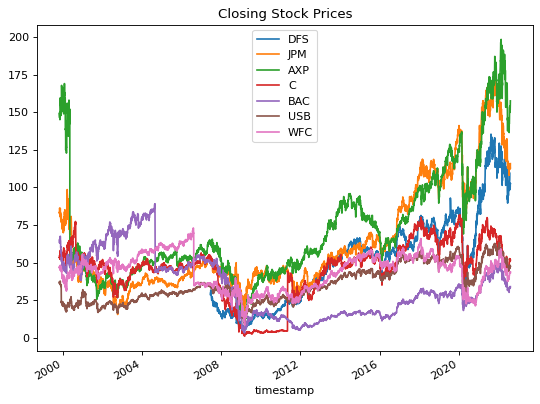

In [ ]:
# Plot closing prices for each stock over time
figure(figsize=(8, 6), dpi=80)

ax = plt.gca()

for i in tickers:
  df_n = df[(df.ticker==i)]
  df_n.plot(kind='line',x='timestamp',y='close',label=i, ax=ax, title='Closing Stock Prices')

plt.legend(tickers)

# Model 

In [ ]:
df.head()

,ticker,close,timestamp
0,DFS,102.35000,2022-08-05
1,DFS,102.36000,2022-08-04
2,DFS,102.76000,2022-08-03
3,DFS,100.16000,2022-08-02
4,DFS,102.22000,2022-08-01


In [ ]:
# Create a dictionary of dataframes (one dataframe for each stock)

# Create empty dictionary
d = {}

for i in tickers:
  d[i] = df[(df.ticker==i)]

  #Keep only the timestamp and close columns
  d[i] = d[i][['timestamp','close']]
  d[i].rename(columns={'timestamp':'Date','close': 'Close'},inplace = True)
  # Make the date column the index
  d[i].index = d[i].pop('Date')

In [ ]:
# View one dataframe's values
d['DFS'].head()

,Close
Date,
2022-08-05,102.35000
2022-08-04,102.36000
2022-08-03,102.76000
2022-08-02,100.16000
2022-08-01,102.22000


In [ ]:
# Get our first and last values
# We need the first 4 starting dates, 
# as we need to start at least on day 4 to use previous 3 day's values
d['DFS'].tail(4), d['DFS'].head(1)

(              Close
 Date               
 2007-06-19 29.70000
 2007-06-18 29.93000
 2007-06-15 29.08000
 2007-06-14 28.75000,                Close
 Date                
 2022-08-05 102.35000)

In [ ]:
# Creat dataframe that is just the Discover dataframe
df_DFS = d['DFS']

In [ ]:
# Put the dataframe in ascending order based on the index (the date)
df_DFS = df_DFS.sort_index()

In [ ]:
# Set the starting date equal to the first date in the data
first_date = str_to_datetime('2007-06-19')

target_date = first_date

# Get the date 7 days from now
next_week_dt = target_date+datetime.timedelta(days=7)

# Create 'next_week' which is the next 7 days of data
next_week = df_DFS.loc[target_date:next_week_dt]

# Convert the dates to date formats
str1 = target_date.strftime('%Y-%m-%d')
str2 = next_week_dt.strftime('%Y-%m-%d')

# Set the values of next week
next_week = df_DFS.loc[target_date:next_week_dt]

# Create the 
next_datetime_str = str(next_week.head(2).tail(1).index.values[0])


In [ ]:
# Create windowed data function to get value and previous 3 values for each day
# This is what will be used by model
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  # set first and last date to date format using custom function 
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  # the target date is the first_date
  target_date = first_date
  
  # create empty list for dates, X, & Y
  dates = []
  X, Y = [], []

  # Set checker to False
  last_time = False


  while True:
    # Get target date, iterate
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    # Do this whle the subset length doesn't equal n + 1 (value passed to function) 
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    # set the values equal to the closing price
    values = df_subset['Close'].to_numpy()
    # set x & y values
    x, y = values[:-1], values[-1]

    # Append the date, X , & Y to each applicable list
    dates.append(target_date)
    X.append(x)
    Y.append(y)

    # Set next week variable equaly to 7 days from given date
    next_week_dt = target_date+datetime.timedelta(days=7)

    # Set tartet and next week dates to str formats
    str1 = target_date.strftime('%Y-%m-%d')
    str2 = next_week_dt.strftime('%Y-%m-%d')

    # Set next week equal to next range of target date to target date + 7 days
    next_week = dataframe.loc[str1:str2]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
  # Create empty dataframe and add dates to new Target DAtes Columns  
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  # Add X values to dataframe
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
    
  # Add Y values to dataframe
  ret_df['Target'] = Y

  return ret_df


In [ ]:
# Run Function
windowed_df = df_to_windowed_df(df_DFS, 
                                '2022-01-03',
                                '2022-07-29', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-01-03,115.77000,115.83000,115.56000,118.64000
1,2022-01-04,115.83000,115.56000,118.64000,122.30000
2,2022-01-05,115.56000,118.64000,122.30000,120.64000
3,2022-01-06,118.64000,122.30000,120.64000,122.82000
4,2022-01-07,122.30000,120.64000,122.82000,125.69000
...,...,...,...,...,...
139,2022-07-25,109.80000,100.00000,100.00000,100.02000
140,2022-07-26,100.00000,100.00000,100.02000,98.36000
141,2022-07-27,100.00000,100.02000,98.36000,100.29000
142,2022-07-28,100.02000,98.36000,100.29000,99.48000


In [ ]:
# Convert windowed function output to numpy array

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  # Get the dates for all the rows for the first column
  dates = df_as_np[:, 0]

  # Get all columns (besides date column) up to the next to last column
  middle_matrix = df_as_np[:, 1:-1]

  # Create the matrix for the model (univariate)
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  # Set Y to all records, but only for the last column
  Y = df_as_np[:, -1]

  # Return the data, but with set data types as float32
  return dates, X.astype(np.float32), Y.astype(np.float32)

# Set date, X, & Y to the function- passing in the windowed_df to the function
dates, X, y = windowed_df_to_date_X_y(windowed_df)

# View the shapes of each
dates.shape, X.shape, y.shape

((144,), (144, 3, 1), (144,))

In [ ]:
dates, X, y

(array([Timestamp('1999-11-04 00:00:00'), Timestamp('1999-11-05 00:00:00'),
        Timestamp('1999-11-08 00:00:00'), ...,
        Timestamp('2022-08-03 00:00:00'), Timestamp('2022-08-04 00:00:00'),
        Timestamp('2022-08-05 00:00:00')], dtype=object), array([[[46.88],
         [47.38],
         [46.13]],
 
        [[47.38],
         [46.13],
         [47.  ]],
 
        [[46.13],
         [47.  ],
         [46.81]],
 
        ...,
 
        [[43.87],
         [43.54],
         [42.88]],
 
        [[43.54],
         [42.88],
         [43.89]],
 
        [[42.88],
         [43.89],
         [42.77]]], dtype=float32), array([47.  , 46.81, 47.13, ..., 43.89, 42.77, 43.76], dtype=float32))

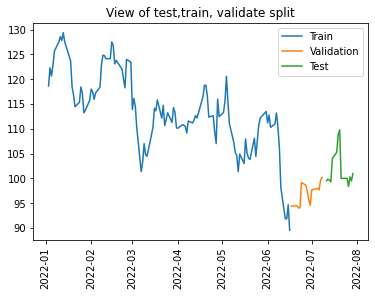

In [ ]:
# Split the data into train, validation, & testing

# Training will be 80%, 
# Validation will be the next 10%
# Testing will be the last 10%

# Set the length of 80%
# Set the lenght of 90% 
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Select the data for the training, testing, and valiation
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Plot the split of train, test, split
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.xticks(rotation=90)
plt.title("View of test,train, validate split")
plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
# Import tensor flow dependencies

# Sequential Model
from tensorflow.keras.models import Sequential
# Optimizier
from tensorflow.keras.optimizers import Adam
# Add layers
from tensorflow.keras import layers

# Create model & Add layers
model = Sequential([layers.Input((3, 1)), # specify shape of model
                    layers.LSTM(80), # set neurons
                    layers.Dense(32, activation='relu'), # Add dense relu layer
                    layers.Dense(32, activation='relu'), # Add another dense relu layer
                    layers.Dense(1)]) # Univariate so leave at 1

# Set complilation
model.compile(loss='mse', # We want to minimize the mse
              optimizer=Adam(learning_rate=0.001), # Set optimizer to Adam & set learning rate
              metrics=['mean_absolute_error']) # Set MAE as the metrics

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80)                26240     
                                                                 
 dense (Dense)               (None, 32)                2592      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,921
Trainable params: 29,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model, using 100 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 179ms/step - loss: 12921.5586 - mean_absolute_error: 113.3980 - val_loss: 9288.2627 - val_mean_absolute_error: 96.3517
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 12809.6250 - mean_absolute_error: 112.9020 - val_loss: 9190.5732 - val_mean_absolute_error: 95.8434
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 12703.0459 - mean_absolute_error: 112.4297 - val_loss: 9098.2852 - val_mean_absolute_error: 95.3607
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 12589.9932 - mean_absolute_error: 111.9253 - val_loss: 8995.5410 - val_mean_absolute_error: 94.8205
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 12464.7979 - mean_absolute_error: 111.3648 - val_loss: 8872.5381 - val_mean_absolute_error: 94.1696
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 12310.9258 - mean_absolute_error: 110.6699 - val_loss: 8721.8486 - 

In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

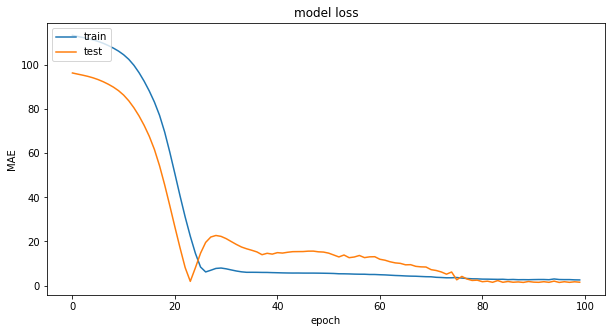

In [ ]:
# history for loss
plt.figure(figsize = (10,5))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(array([738156., 738187., 738215., 738246., 738276., 738307.]),
 <a list of 6 Text major ticklabel objects>)

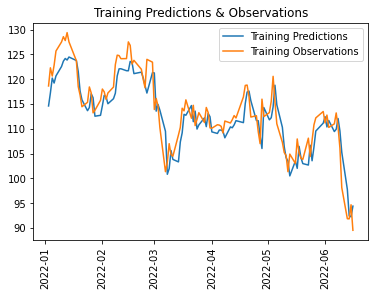

In [ ]:
# Plot the predictions vs the actuals
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.title("Training Predictions & Observations")
plt.legend(['Training Predictions', 'Training Observations'])
plt.xticks(rotation=90)

(array([738323., 738327., 738331., 738335., 738337., 738341., 738345.]),
 <a list of 7 Text major ticklabel objects>)

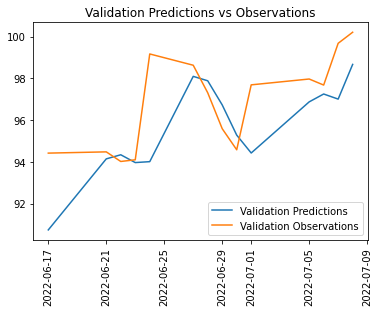

In [ ]:
# Plot the validation predictions vs the observations

val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.title("Validation Predictions vs Observations")
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.xticks(rotation=90)

(array([738347., 738349., 738351., 738353., 738355., 738357., 738359.,
        738361., 738363., 738365.]),
 <a list of 10 Text major ticklabel objects>)

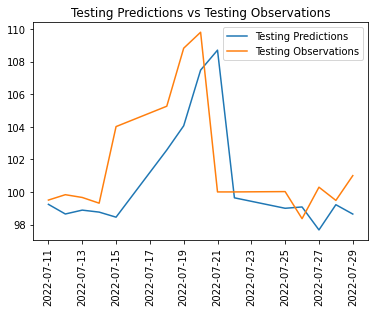

In [ ]:
# Plot the Testing Predictions vs the Testing Actuals

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.title("Testing Predictions vs Testing Observations")
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.xticks(rotation=90)

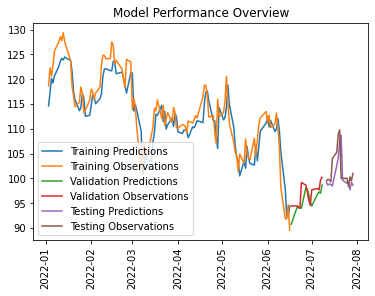

In [ ]:
# Plot all together

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.title("Model Performance Overview")
plt.xticks(rotation=90)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

# Implementing the Model on the Rest of the Stocks

In [ ]:
pred_comb = pd.DataFrame()

for i in d:
  df_t = d[i]

 #----GENERATE THE DATES
  # Put the dataframe in ascending order based on the index (the date)
  df_t = df_t.sort_index()

  fst_dt_1 = df_t.index[3]
  fst_dt = fst_dt_1.strftime('%Y-%m-%d')
  # Set the starting date equal to the first date in the data
  first_date = ('{}'.format(fst_dt))

  target_date = fst_dt_1

  # Get the date 7 days from now
  next_week_dt = target_date+datetime.timedelta(days=7)

  # Create 'next_week' which is the next 7 days of data
  next_week = df_t.loc[target_date:next_week_dt]

  # Convert the dates to date formats
  str1 = target_date.strftime('%Y-%m-%d')
  str2 = next_week_dt.strftime('%Y-%m-%d')

  # Set the values of next week
  next_week = df_t.loc[target_date:next_week_dt]
  next_datetime_str = str(next_week.head(2).tail(1).index.values[0])


# GENERATE WINDOWED DATA
  max_index =  len(df_t)-1
  max_date = df_t.index[max_index].strftime('%Y-%m-%d')
  
  windowed_df = df_to_windowed_df(df_t, '{}'.format(fst_dt), '{}'.format(max_date) , n=3)
  dates, X, y = windowed_df_to_date_X_y(windowed_df)

  # Set the length percent for train, validation, & test
  q_80 = int(len(dates) * .8)
  q_90 = int(len(dates) * .9)

  # Select the data for the training, testing, and valiation
  dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
  dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
  dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]


  # Fit the model, using 100 epochs
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)


  # Set complilation
  model.compile(loss='mse', # We want to minimize the mse
                optimizer=Adam(learning_rate=0.001), # Set optimizer to Adam & set learning rate
                metrics=['mean_absolute_error']) # Set MAE as the metrics



  print(i+" complete ")

  # Predict the next 15 days
  pred_vals = model.predict(X_test)

  # Generate list of dates that were predicted
  numdays = len(dates_test)
  base = dates_test[-1:] + datetime.timedelta(1)
  pred_dates = [base + datetime.timedelta(days=x) for x in range(numdays)]


  pred_comb['dates'] = pd.DataFrame(pred_dates, columns = ['dates'])
  pred_comb = pred_comb.head(15)
  predic_vals_df = pd.DataFrame(pred_vals, columns = ['vals'])
  predic_vals_df = predic_vals_df.head(15)
  pred_comb.insert(1, i, predic_vals_df)

 

DFS complete 
JPM complete 
AXP complete 
C complete 
BAC complete 
USB complete 
WFC complete 


In [ ]:
  #Combined Predictions Output
  pred_comb

,dates,WFC,USB,BAC,C,AXP,JPM,DFS
0,2022-08-06,28.66337,36.72343,23.76022,47.15524,87.49784,95.86562,83.76031
1,2022-08-07,29.73377,38.53696,24.65550,50.18599,96.80535,98.76174,81.86189
2,2022-08-08,28.95728,36.86708,24.00541,48.47065,89.00744,96.32678,87.96178
3,2022-08-09,27.61097,35.24868,23.07750,45.53086,87.01344,93.86720,90.18279
4,2022-08-10,27.28582,34.64864,22.89117,45.09571,85.34126,92.80294,92.57491
5,2022-08-11,26.33453,33.73286,22.59920,43.92514,85.87886,92.61179,93.08434
6,2022-08-12,25.64866,33.37173,22.29195,42.93924,83.00412,91.06413,93.51119
7,2022-08-13,25.26046,34.25563,22.75171,44.66571,85.99227,91.74387,93.20435
8,2022-08-14,25.40736,34.81152,23.44784,46.30727,88.82041,93.16970,93.29051
9,2022-08-15,24.83765,33.56123,22.52759,44.04236,84.08997,90.83474,93.18523


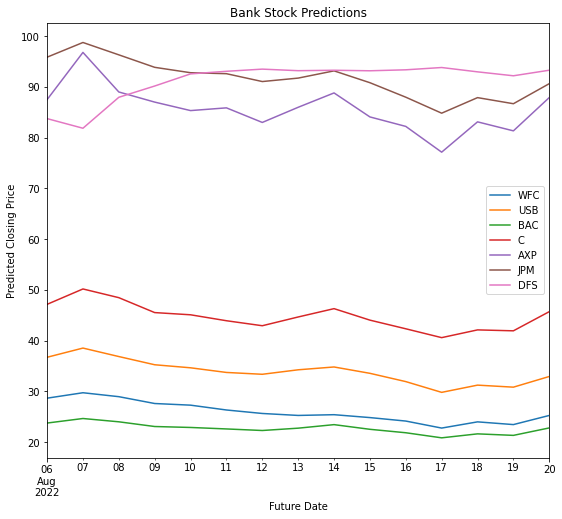

In [ ]:
# plot the dataframe
pred_comb.plot(x='dates', y=["WFC",	"USB","BAC","C","AXP","JPM","DFS"], kind="line", figsize=(9, 8), title='Bank Stock Predictions')
plt.legend(["WFC",	"USB","BAC","C","AXP","JPM","DFS"])
plt.xlabel('Future Date')
plt.ylabel('Predicted Closing Price')
plt.show()